## Bernstein Vazirani Algorithm

It can be considered as a generalization of David Josza ALgorithm(DJ algorithm). 
The problem consist of  a black box oracle function that performs bit wise product(mod 2) given by $f(x) = s.x(mod 2)$, where x in the input to the function and s is a string built into the oracle function. And our task is to determine the string s. 

The blackbox function f takes x as input and returns either 0 or 1 as output.

### Classical solution

Let us look at the the problem more closely. We have a function $f(x) = s.x(mod 2)$. 's'='$s_{1}s_{2}...s_{n}$' is a binary string built in into the function. Here we input different values of x= '$x_{1}x_{2}...x_{n}$' into the function, so as to learn the string 's'.(Here $s.x = \sum_{i=1}^{n} s_{i}*x_{i}$ ) The code below takes 3 binary bits: ['100','010','001'] as input for function $f(x)$. The output of function for each string gives the value of bit corresponding to position of '1'. So if s is '100', $f(100)$ ='1' ,$f(010)$ ='0' and $f(001)$ ='0'.

In [13]:
s='111'  # A random 3 bit string
n=len(s)
set=[]  
for j in range(n):
    # print(j)
    xstr=[0,0,0]
    xstr[j]=1
    set.append(xstr)  #produce a set: set= ['100','010','001']
out=[]

for x in set:
    f=0
    for i in range(n):  # f= s.x
        t=(int(s[i])& x[i])
        f+=t
    out.append(f%2)
print("Values of x are:",set)
print("The string 's' is ", out)
''' Classical solution for BV algorithm'''

Values of x are: [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
The string 's' is  [1, 1, 1]


' Classical solution for BV algorithm'

Classical solution uses 3 values and hence need to run circuit 3 times for different values of x to get the final answer. But quantum solution only needs one operations to accurately determine the string s. The advantage is mostly due the property of quantum computer namely Quantum Parallelism, which is derived due to superposition of states.

In [2]:
%matplotlib inline
from math import pi
import numpy as np
from qiskit import *
from qiskit.visualization import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import Aer
from qiskit.providers.aer import unitary_simulator
backend = Aer.get_backend('unitary_simulator')
simulator = Aer.get_backend('qasm_simulator')
statevector= Aer.get_backend('statevector_simulator')
%config InlineBackend.figure_format = 'svg'

In [3]:
def BV_blackbox(n,s):  #a blackbox 
    qc= QuantumCircuit(n+1)
    st=s[::-1]  
    #s='111'#reverse string to match qiskit's ordering(reverse)
    for i in range(len(st)):
        if st[i]== '1':
            qc.cx(i,n)
   
    return qc.to_gate()
def BV_algorithm(s):
    n=len(s)
    qc= QuantumCircuit(n+1,n)
    qc.x(n)
    for i in range(n+1):
        qc.h(i)
    
    qc.barrier()
    st=s
    qc.append(BV_blackbox(n,st), range(n+1))
    qc.barrier()
    for i in range(n):
        qc.h(i)
    for i in range(n):
        qc.measure(i,i)
    return qc


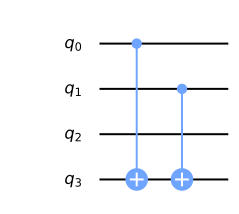

In [4]:
a=BV_blackbox(3,'011').decompositions
a[0].draw(output='mpl')

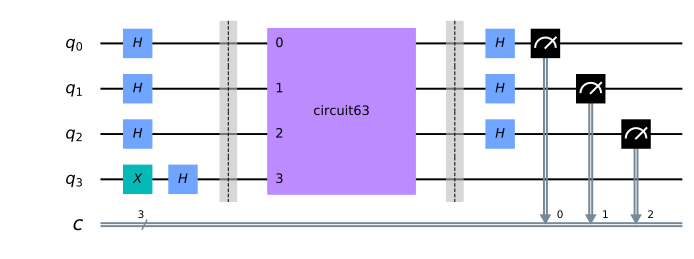

In [5]:
n=3
s='011'
qc = BV_algorithm(s)
qc.draw(output='mpl')


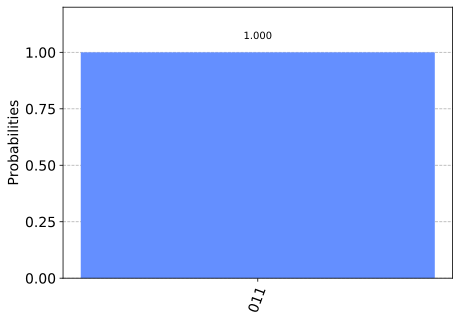

In [6]:
counts=execute(qc,simulator,shots=1000).result().get_counts(qc) # simulator = Aer.get_backend('qasm_simulator')
plot_histogram(counts)

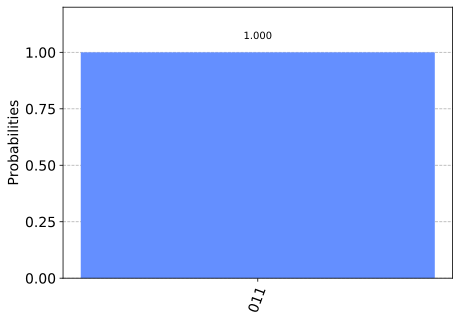

In [7]:
n=3
qc= QuantumCircuit(n+1,n)
qc.x(n)    
for i in range(n+1):
    qc.h(i)

qc.barrier()
s='011'      #reverse string to match qiskit's ordering(reverse)
s=s[::-1]  
for i in range(len(s)):
    if s[i]== '1':
        qc.cx(i,n)
qc.barrier()
for i in range(n):
    qc.h(i)

for a in range(n):
     qc.measure(a,a)


qc.draw(output='mpl')
counts=execute(qc,simulator,shots=1000).result().get_counts(qc) # simulator = Aer.get_backend('qasm_simulator')
plot_histogram(counts)

In [11]:
print(counts.keys())    

dict_keys(['011'])
